In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.DataFrame({'key1': ['a', 'a', 'b', 'b', 'a'], 'key2': ['one', 'two', 'one', 'two', 'one'], 'data1': np.random.randn(5), 'data2': np.random.randn(5)})

In [4]:
df

,key1,key2,data1,data2
0,a,one,-0.321553,-0.560474
1,a,two,1.124921,-2.472161
2,b,one,0.220274,0.990180
3,b,two,-0.350418,1.494634
4,a,one,-1.312181,0.027659


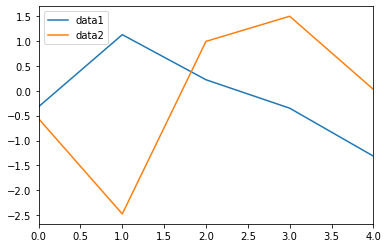

In [5]:
df.plot()

In [6]:
grouped = df['data1'].groupby(df['key1'])

In [7]:
grouped

In [8]:
grouped.mean()

key1
a   -0.169604
b   -0.065072
Name: data1, dtype: float64

In [10]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()

In [11]:
means

key1  key2
a     one    -0.816867
      two     1.124921
b     one     0.220274
      two    -0.350418
Name: data1, dtype: float64

In [12]:
means.unstack()

key2,one,two
key1,,
a,-0.816867,1.124921
b,0.220274,-0.350418


In [14]:
means.unstack()

key2,one,two
key1,,
a,-0.816867,1.124921
b,0.220274,-0.350418


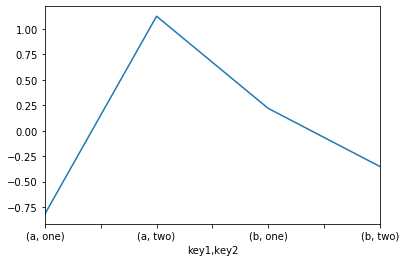

In [15]:
means.plot()

In [19]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])

In [20]:
years = np.array([2005, 2005, 2006, 2005, 2006])

In [21]:
df['data1'].groupby([states, years]).mean()

California  2005    1.124921
            2006    0.220274
Ohio        2005   -0.335985
            2006   -1.312181
Name: data1, dtype: float64

In [22]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.169604,-1.001659
b,-0.065072,1.242407


In [24]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.816867 -0.266407
     two   1.124921 -2.472161
b    one   0.220274  0.990180
     two  -0.350418  1.494634

In [25]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [26]:
# 对分组进行迭代

In [28]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -0.321553 -0.560474
1    a  two  1.124921 -2.472161
4    a  one -1.312181  0.027659
b
  key1 key2     data1     data2
2    b  one  0.220274  0.990180
3    b  two -0.350418  1.494634


In [29]:
for (k1, k2) in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

(('a', 'one'),   key1 key2     data1     data2
0    a  one -0.321553 -0.560474
4    a  one -1.312181  0.027659)
  key1 key2     data1     data2
2    b  one  0.220274  0.990180
3    b  two -0.350418  1.494634
(('a', 'two'),   key1 key2     data1     data2
1    a  two  1.124921 -2.472161)
  key1 key2     data1     data2
2    b  one  0.220274  0.990180
3    b  two -0.350418  1.494634
(('b', 'one'),   key1 key2     data1    data2
2    b  one  0.220274  0.99018)
  key1 key2     data1     data2
2    b  one  0.220274  0.990180
3    b  two -0.350418  1.494634
(('b', 'two'),   key1 key2     data1     data2
3    b  two -0.350418  1.494634)
  key1 key2     data1     data2
2    b  one  0.220274  0.990180
3    b  two -0.350418  1.494634


In [30]:
pieces = dict(list(df.groupby('key1')))

In [31]:
pieces['b']

,key1,key2,data1,data2
2,b,one,0.220274,0.990180
3,b,two,-0.350418,1.494634


In [32]:
pieces

{'a':   key1 key2     data1     data2
 0    a  one -0.321553 -0.560474
 1    a  two  1.124921 -2.472161
 4    a  one -1.312181  0.027659, 'b':   key1 key2     data1     data2
 2    b  one  0.220274  0.990180
 3    b  two -0.350418  1.494634}

In [35]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [36]:
grouped = df.groupby(df.dtypes, axis=1)

In [37]:
for dtype, group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0 -0.321553 -0.560474
1  1.124921 -2.472161
2  0.220274  0.990180
3 -0.350418  1.494634
4 -1.312181  0.027659
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


In [40]:
df.groupby('key1')['data1']
df.groupby('key1')[['data2']]

In [41]:
s_grouped = df.groupby(['key1', 'key2'])['data2']

In [43]:
s_grouped.mean()

key1  key2
a     one    -0.266407
      two    -2.472161
b     one     0.990180
      two     1.494634
Name: data2, dtype: float64

In [44]:
people = pd.DataFrame(np.random.randn(5, 5), columns=['a','b','c','d','e'], index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])

In [45]:
people.iloc[2:3, [1, 2]] = np.nan

In [46]:
people

,a,b,c,d,e
Joe,1.356524,-0.016621,0.623837,1.606845,-1.131691
Steve,-0.302873,-0.144145,-0.657735,1.415125,1.564441
Wes,1.305459,NaN,NaN,2.461121,-0.479410
Jim,-1.523952,-0.144658,-0.869542,1.736438,-0.178632
Travis,-1.569428,0.320383,0.557445,-1.694993,-0.256837


In [47]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f': 'orange'}

In [48]:
by_column = people.groupby(mapping, axis=1)

In [49]:
by_column.sum()

,blue,red
Joe,2.230682,0.208212
Steve,0.757390,1.117423
Wes,2.461121,0.826049
Jim,0.866896,-1.847241
Travis,-1.137548,-1.505883


In [51]:
map_series = pd.Series(mapping)

In [52]:
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [53]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


In [54]:
# 通过函数进行分组

In [55]:
people.groupby(len).sum()

,a,b,c,d,e
3,1.138031,-0.161278,-0.245706,5.804404,-1.789733
5,-0.302873,-0.144145,-0.657735,1.415125,1.564441
6,-1.569428,0.320383,0.557445,-1.694993,-0.256837


In [56]:
key_list = ['one', 'one', 'one', 'two', 'two']

In [57]:
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one  1.305459 -0.016621  0.623837  1.606845 -1.131691
  two -1.523952 -0.144658 -0.869542  1.736438 -0.178632
5 one -0.302873 -0.144145 -0.657735  1.415125  1.564441
6 two -1.569428  0.320383  0.557445 -1.694993 -0.256837

In [58]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'], [1,3,5,1,3]], names=['cty', 'tenor'])

In [59]:
hier_df = pd.DataFrame(np.random.randn(4,5), columns=columns)

In [60]:
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      1.245197 -0.994543  0.503249  0.241708 -0.578318
1      0.305458 -0.140763 -0.683990  0.270974  0.235730
2      0.327674  0.559749 -0.029594 -0.301240  0.918387
3     -0.823175 -2.314821 -0.309421 -0.952159  0.891823

In [61]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


In [62]:
# 数据聚合

In [63]:
df

,key1,key2,data1,data2
0,a,one,-0.321553,-0.560474
1,a,two,1.124921,-2.472161
2,b,one,0.220274,0.990180
3,b,two,-0.350418,1.494634
4,a,one,-1.312181,0.027659


In [64]:
grouped = df.groupby('key1')

In [65]:
grouped['data1'].quantile(0.9)

key1
a    0.835626
b    0.163204
Name: data1, dtype: float64

In [66]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [67]:
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,2.437101,2.499820
b,0.570691,0.504454


In [68]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0 -0.169604  1.225635 -1.312181 -0.816867 -0.321553  0.401684   
b      2.0 -0.065072  0.403540 -0.350418 -0.207745 -0.065072  0.077601   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.124921   3.0 -1.001659  1.307003 -2.472161 -1.516317 -0.560474   
b     0.220274   2.0  1.242407  0.356703  0.990180  1.116294  1.242407   

                          
           75%       max  
key1                      
a    -0.266407  0.027659  
b     1.368521  1.494634

In [69]:
tips = pd.read_csv('examples/tips.csv')

In [70]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [71]:
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [73]:
grouped = tips.groupby(['day', 'smoker'])

In [74]:
grouped_pct = grouped['tip_pct']

In [75]:
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [76]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [77]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [78]:
functions = ['count', 'mean', 'max']

In [79]:
result = grouped['tip_pct', 'total_bill'].agg(functions)

In [80]:
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [81]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255